In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

Dataset = sio.loadmat('Dataset6.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

## Exercise 3

#### X1 dataset

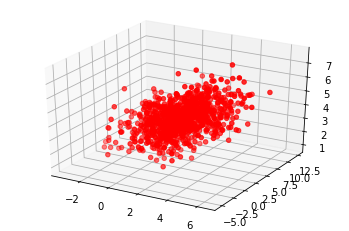

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0],X1[:,1],X1[:,2],c='r', marker='o')
plt.show()

Maybe we can model the pdfs as Gaussian. The parameters according to the Maximum Likelihood cretirion are the following.

In [4]:
mean_X1 = np.mean(X1,axis=0); mean_X1

array([1.88364427, 2.94930523, 3.94277602, 4.91643708])

In [5]:
cov_X1 = 1/len(X1) * np.dot((X1-mean_X1).T,X1-mean_X1); cov_X1

array([[ 2.51182857,  0.11874089,  0.98495038,  1.08330846],
       [ 0.11874089,  5.7401137 ,  0.11198481, -2.28583666],
       [ 0.98495038,  0.11198481,  1.30976286,  1.14052246],
       [ 1.08330846, -2.28583666,  1.14052246,  6.21080837]])

In [6]:
np.cov(X1,rowvar=False,bias=True)

array([[ 2.51182857,  0.11874089,  0.98495038,  1.08330846],
       [ 0.11874089,  5.7401137 ,  0.11198481, -2.28583666],
       [ 0.98495038,  0.11198481,  1.30976286,  1.14052246],
       [ 1.08330846, -2.28583666,  1.14052246,  6.21080837]])

In [7]:
x1 = np.array([2.01, 2.99, 3.98, 5.02])
x2 = np.array([20.78, -15.26, 19.38, -25.02])
x3 = np.array([3.08, 3.88, 4.15, 6.02])

In [8]:
p_x1 = multivariate_normal.pdf(x1,mean_X1,cov_X1); p_x1

0.0033790407528665016

In [9]:
p_x2 = multivariate_normal.pdf(x2,mean_X1,cov_X1); p_x2

1.2861562399365526e-206

In [10]:
p_x3 = multivariate_normal.pdf(x3,mean_X1,cov_X1); p_x3

0.0019520755858057207

#### X2 dataset

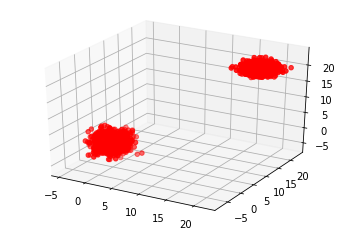

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:,1],X2[:,2],X2[:,3],c='r', marker='o')
plt.show()

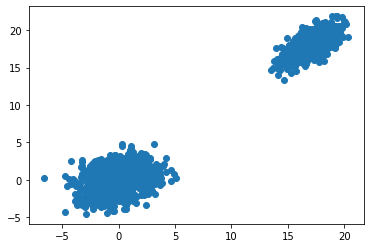

In [59]:
plt.scatter(X2[:,0],X2[:,1])

In [64]:
gm = GaussianMixture(n_components=2)

In [65]:
gm.fit(X2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Score_samples returns the log probabilities, so we want the exp of this.

In [81]:
x1 = np.array([0.05, 0.15, -0.12, -0.08])
x2 = np.array([7.18, 7.98, 9.12, 9.94])
x3 = np.array([3.48, 4.01, 4.55, 4.96]) 
x4 = np.array([20.78, -15.26, 19.38, -25.02])

In [82]:
p_x1 = np.exp(gm.score_samples(x1[None])); p_x1

array([0.00157831])

In [83]:
p_x2 = np.exp(gm.score_samples(x2[None])); p_x2

array([1.8048893e-24])

In [84]:
p_x3 = np.exp(gm.score_samples(x3[None])); p_x3

array([8.69261803e-09])

In [85]:
p_x4 = np.exp(gm.score_samples(x4[None])); p_x4

array([2.06034186e-102])